In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S3/Office_Amelie-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 1s 6ms/step - loss: 1344.6030
Epoch 2/300
45/45 [==============================] - 0s 6ms/step - loss: 1245.7507
Epoch 3/300
45/45 [==============================] - 0s 6ms/step - loss: 1146.8906
Epoch 4/300
45/45 [==============================] - 0s 6ms/step - loss: 1066.4054
Epoch 5/300
45/45 [==============================] - 0s 11ms/step - loss: 1016.4305
Epoch 6/300
45/45 [==============================] - 0s 10ms/step - loss: 973.3860
Epoch 7/300
45/45 [==============================] - 0s 10ms/step - loss: 929.7234
Epoch 8/300
45/45 [==============================] - 1s 13ms/step - loss: 890.5360
Epoch 9/300
45/45 [==============================] - 0s 10ms/step - loss: 856.9120
Epoch 10/300
45/45 [==============================] - 0s 9ms/step - loss: 825.6615
Epoch 11/300
45/45 [==============================] - 0s 9ms/step - loss: 794.5433
Epoch 12/300
45/45 [==============================] - 0s 10ms/step - loss: 764.8106
Ep

In [13]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [17]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 4.628869399471852
Root Mean Squared Error for RNN Model for testing is: 6.650954619916727
Mean Absolute Error for RNN Model for training is: 2.810101013536068
Mean Absolute Error for RNN Model for testing is: 3.8193482465853634
MAPE for RNN Model for training is: 0.11951843701053397
MAPE for RNN Model for testing is: 0.12688085762602036


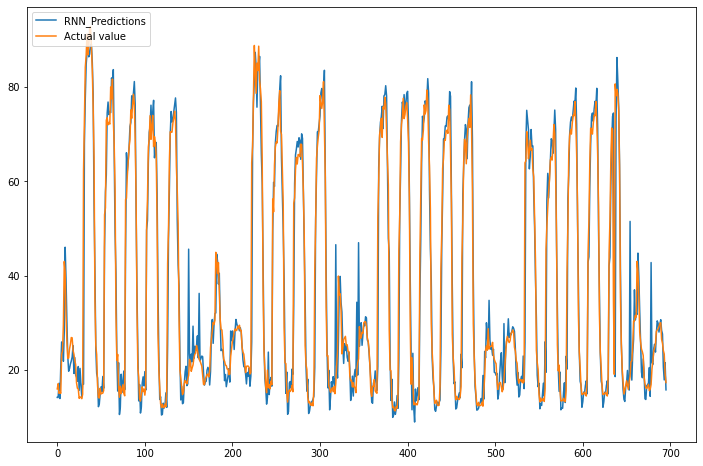

In [18]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([16.01]), array([14.207856], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([1.80214382]), array([2.92836891]), array([-2.14481873]), array([1.38490257]), array([-5.60793274]), array([-2.53789909]), array([-1.66738243]), array([7.75857628]), array([14.87858131]), array([-5.2064859]), array([-7.66367126]), array([-4.38428589]), array([-0.48399498]), array([2.80415779]), array([4.15670845]), array([4.16588707]), array([4.97980347]), array([4.08379349]), array([-0.94377663]), array([4.07731544]), array([-0.59225029]), array([2.22237961]), array([-1.2510688]), array([-1.49853455]), array([-4.75609016]), array([-1.67763351]), array([-6.0389077]), array([-2.67434792]), array([-0.36354786]), array([-2.28256355]), array([45.28583984]), array([5.5463327]), array([6.5682251]), array([1.99969391]), array([4.13763641]), array([-2.82535522]), array([2.41210968]), array([5.51521973]), array([3.84541779]), array([-0.92620453]), array([-1.43945404]), array([-2.99434143]), array([9.71585083]), array([-5.93639404]), array([0.5069706]), array([3.96404434]), array([-1.5935

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([62.05452339]), array([-39.4910202]))

In [22]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [23]:
len(neg),len(pos)

(372, 324)